In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Import Libraries
#  Set Up Your Environment

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up paths
base_dir = 'data/'  # Change this to your dataset path
tiger_dir = base_dir + 'tigers/'
lion_dir = base_dir + 'lions/'

# Data augmentation and loading
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)
# Prepare Your Dataset

Found 80 images belonging to 2 classes.


Found 20 images belonging to 2 classes.


In [3]:
# build
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.3438 - loss: 3.0058 - val_accuracy: 0.5000 - val_loss: 1.0442
Epoch 2/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.6250 - loss: 0.9145

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.6250 - loss: 0.9145 - val_accuracy: 0.5000 - val_loss: 0.7704
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 791ms/step - accuracy: 0.5174 - loss: 0.8266 - val_accuracy: 0.8000 - val_loss: 0.6823
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.8125 - loss: 0.6692 - val_accuracy: 0.7500 - val_loss: 0.6823
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.7396 - loss: 0.6575 - val_accuracy: 0.6500 - val_loss: 0.6620
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - accuracy: 0.6250 - loss: 0.6298 - val_accuracy: 0.5000 - val_loss: 0.6535
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5000 - loss: 0.6342 - val_accuracy: 0.7000 - val_loss: 0.6232
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 314ms/step - accuracy: 0.6875 - loss: 0.5285 - val_accuracy: 0.6500 - val_loss: 0.5976
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.7222 - loss: 0.4971 - val_accuracy: 0.7000 - val_loss: 0.5441
Epoch 10/20


In [5]:
# Evaluate the Model
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_acc:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.8000 - loss: 0.3724
Validation accuracy: 0.80


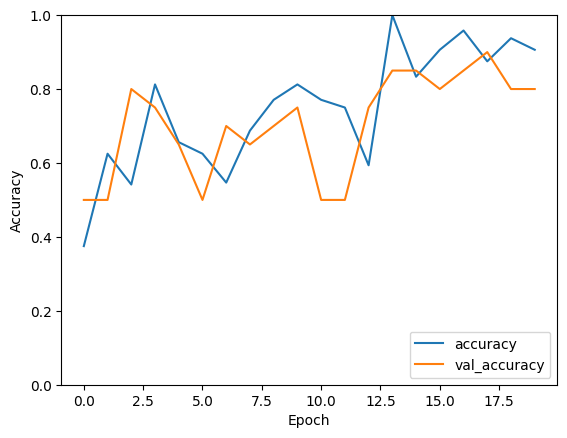

In [6]:
#  Plot Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np

def classify_image(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image to 224x224
    img_array = image.img_to_array(img) / 255.0  # Convert image to array and normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Predict the class using the model
    predictions = model.predict(img_array)
    
    # Define class names
    class_names = ['Lion', 'Tiger']
    
    # Convert prediction to class label based on threshold
    predicted_class = class_names[int(predictions[0][0] > 0.5)]  # Use threshold for binary classification
    
    return predicted_class


model.save('tiger_lion_model.h5')
# Example usage
print(classify_image('tiger2.jpg',model))





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Tiger
